In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt              # Visualization using matplotlib
%matplotlib inline
import seaborn as sns    

In [3]:
!pip install catboost

In [5]:
!pip install lightgbm

from sklearn.model_selection import train_test_split                     # split  data into training and testing sets
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier                           # Decision tree Regression
import xgboost
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, classification_report      # this creates a confusion matrix
from sklearn.model_selection import GridSearchCV                         # this will do cross validation


# 2. EDA(Exploratory Data Analysis)

### a.  Understand data

In [81]:
# Loading the train, test & sample dataset
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [82]:
# make copy of train & test
train_original = train.copy()
test_original = test.copy()

In [83]:
# checking dimension (num of rows and columns) of datasets
display(train.shape)
display(test.shape)

(50882, 14)

(21805, 13)

In [84]:
# import first rows
train.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health_Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3,1.0,16,10404.0,0


In [85]:
# import first rows
test.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health_Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30,30,No,NaN,6,3.0,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3,3.0,18,32204.8
2,50885,C1,564,Rented,Individual,28,28,No,X3,2,4.0,17,9240.0
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3,3.0,18,9086.0
4,50887,C1,951,Owned,Individual,75,75,No,X3,NaN,NaN,5,22534.0


In [86]:
# check dataframe structure like columns and its counts, datatypes & Null Values
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health_Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

In [87]:
train["City_Code"].nunique()

36

<AxesSubplot:>

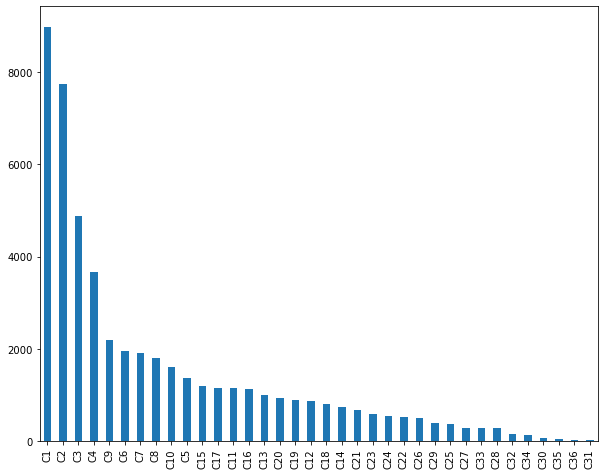

In [88]:
plt.figure(figsize=(10,8))
train["City_Code"].value_counts().plot.bar()

In [89]:
train["Accomodation_Type"].nunique()

2

In [16]:
train["Accomodation_Type"].value_counts()

Owned     27951
Rented    22931
Name: Accomodation_Type, dtype: int64

In [17]:
train["Is_Spouse"].value_counts()

No     42460
Yes     8422
Name: Is_Spouse, dtype: int64

In [90]:
train["Health_Indicator"].value_counts()

X1    13010
X2    10332
X3     6762
X4     5743
X5     1727
X6     1280
X7      196
X8       78
X9       63
Name: Health_Indicator, dtype: int64

In [91]:
train["Holding_Policy_Duration"].value_counts()

1      4499
14+    4335
2      4260
3      3586
4      2771
5      2362
6      1894
7      1645
8      1316
9      1114
10      813
11      546
12      513
13      511
14      466
Name: Holding_Policy_Duration, dtype: int64

In [92]:
train["Holding_Policy_Duration"] = train["Holding_Policy_Duration"].replace('14+', 14)
test["Holding_Policy_Duration"] = test["Holding_Policy_Duration"].replace('14+', 14)

In [93]:
train["Holding_Policy_Type"].value_counts()

3.0    13279
1.0     8173
2.0     5005
4.0     4174
Name: Holding_Policy_Type, dtype: int64

In [94]:
train["Reco_Policy_Cat"].value_counts()

22    6602
18    5553
21    5027
16    4084
17    3756
19    3708
20    3177
12    2168
1     1967
2     1917
14    1742
13    1684
15    1615
3     1059
4     1015
5     1007
6      851
7      834
9      789
11     781
8      776
10     770
Name: Reco_Policy_Cat, dtype: int64

In [95]:
train["Response"].value_counts()

0    38673
1    12209
Name: Response, dtype: int64

### a.  Clean the data

##### i) Drop unwanted features

In [96]:
train.drop(['ID', 'City_Code', 'Region_Code'], axis=1, inplace=True)

test.drop(['ID', 'City_Code', 'Region_Code'], axis=1, inplace=True)

In [97]:
train.isnull().sum()

Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health_Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [98]:
test.isnull().sum()

Accomodation_Type             0
Reco_Insurance_Type           0
Upper_Age                     0
Lower_Age                     0
Is_Spouse                     0
Health_Indicator           5027
Holding_Policy_Duration    8603
Holding_Policy_Type        8603
Reco_Policy_Cat               0
Reco_Policy_Premium           0
dtype: int64

In [99]:
train["Holding_Policy_Duration"] = train["Holding_Policy_Duration"].astype('float64')
test["Holding_Policy_Duration"] = test["Holding_Policy_Duration"].astype('float64')

In [104]:
train["Health_Indicator"] = train["Health_Indicator"].fillna(train["Health_Indicator"].mode()[0])
train["Holding_Policy_Duration"] = train["Holding_Policy_Duration"].fillna(train["Holding_Policy_Duration"].median())
train["Holding_Policy_Type"] = train["Holding_Policy_Type"].fillna(train["Holding_Policy_Type"].median())

test["Health_Indicator"] = test["Health_Indicator"].fillna(test["Health_Indicator"].mode()[0])
test["Holding_Policy_Duration"] = test["Holding_Policy_Duration"].fillna(test["Holding_Policy_Duration"].median())
test["Holding_Policy_Type"] = test["Holding_Policy_Type"].fillna(test["Holding_Policy_Type"].median())

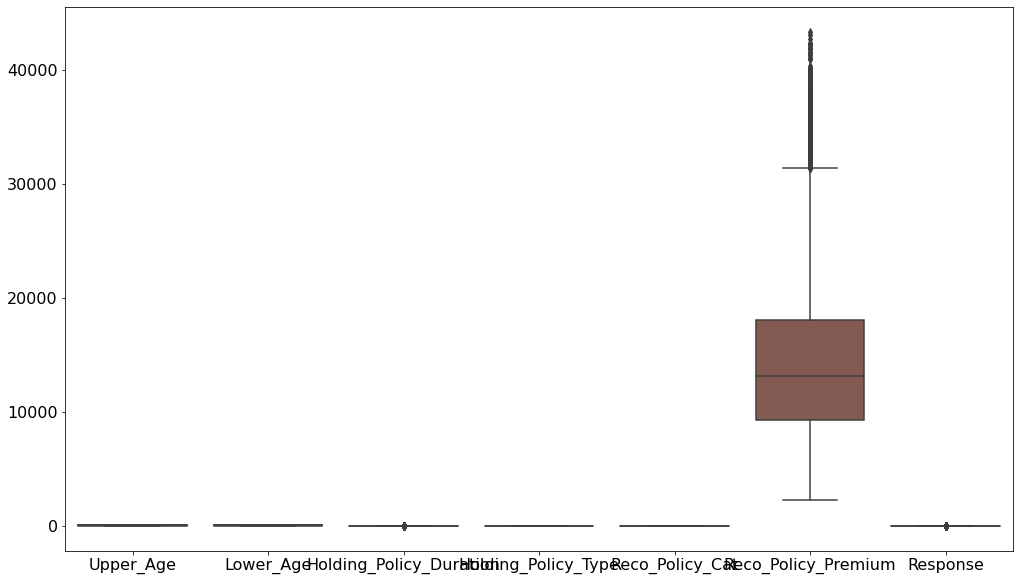

In [105]:
plt.figure(figsize=(17,10))
sns.boxplot(data=train)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()

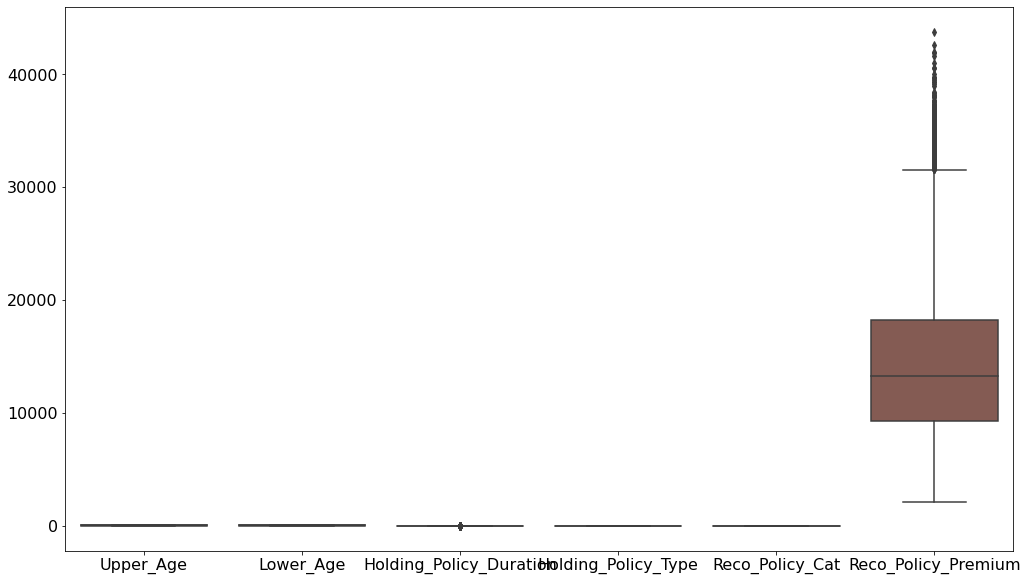

In [106]:
plt.figure(figsize=(17,10))
sns.boxplot(data=test)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()

In [107]:
display(train.skew())
display(test.skew())

Upper_Age                  0.217370
Lower_Age                  0.330594
Holding_Policy_Duration    1.195933
Holding_Policy_Type       -0.912864
Reco_Policy_Cat           -0.928224
Reco_Policy_Premium        0.782463
Response                   1.217936
dtype: float64

Upper_Age                  0.207386
Lower_Age                  0.326725
Holding_Policy_Duration    1.193157
Holding_Policy_Type       -0.878830
Reco_Policy_Cat           -0.926143
Reco_Policy_Premium        0.744149
dtype: float64

C:\Users\ashashiju\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Skew:0.7824628894616024')

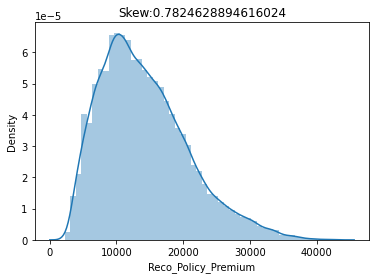

In [108]:
sns.distplot(train['Reco_Policy_Premium'])
Skew_Reco_Policy_Premium = train['Reco_Policy_Premium'].skew()
plt.title("Skew:"+str(Skew_Reco_Policy_Premium))

C:\Users\ashashiju\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Skew:0.7441494510155582')

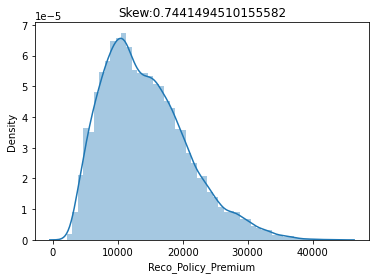

In [109]:
sns.distplot(test['Reco_Policy_Premium'])
Skew_Reco_Policy_Premium = test['Reco_Policy_Premium'].skew()
plt.title("Skew:"+str(Skew_Reco_Policy_Premium))

C:\Users\ashashiju\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Skew:1.1959327028746392')

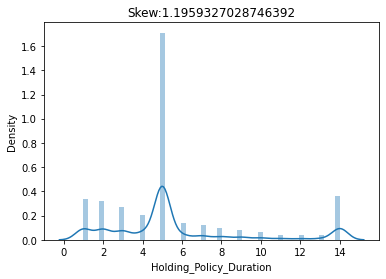

In [110]:
sns.distplot(train['Holding_Policy_Duration'])
Skew_Holding_Policy_Duration = train['Holding_Policy_Duration'].skew()
plt.title("Skew:"+str(Skew_Holding_Policy_Duration))

C:\Users\ashashiju\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Skew:1.1931572352051443')

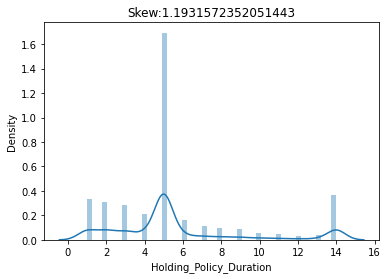

In [111]:
sns.distplot(test['Holding_Policy_Duration'])
Skew_Holding_Policy_Duration = test['Holding_Policy_Duration'].skew()
plt.title("Skew:"+str(Skew_Holding_Policy_Duration))

C:\Users\ashashiju\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Skew:-0.9128644756126452')

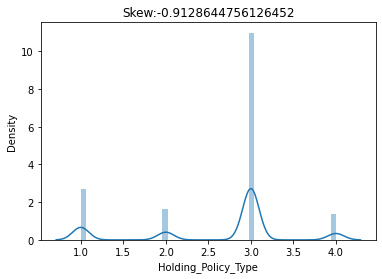

In [112]:
sns.distplot(train['Holding_Policy_Type'])
Skew_Holding_Policy_Type = train['Holding_Policy_Type'].skew()
plt.title("Skew:"+str(Skew_Holding_Policy_Type))

C:\Users\ashashiju\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Skew:-0.9282235542995848')

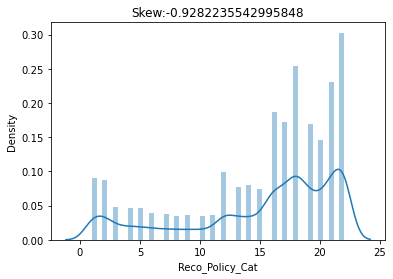

In [113]:
sns.distplot(train['Reco_Policy_Cat'])
Skew_Reco_Policy_Cat = train['Reco_Policy_Cat'].skew()
plt.title("Skew:"+str(Skew_Reco_Policy_Cat))

In [114]:
train.corr()['Reco_Policy_Cat']

Upper_Age                  0.025257
Lower_Age                  0.021163
Holding_Policy_Duration    0.035566
Holding_Policy_Type        0.053760
Reco_Policy_Cat            1.000000
Reco_Policy_Premium        0.060989
Response                   0.114321
Name: Reco_Policy_Cat, dtype: float64

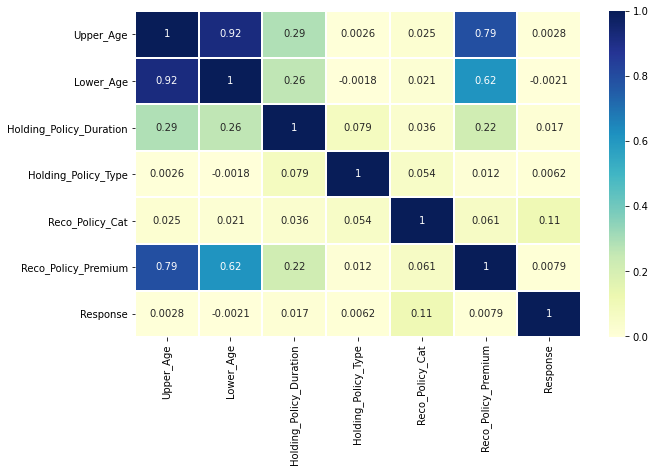

In [115]:
plt.figure(figsize=(10,6)) 
sns.heatmap(train.corr(), annot=True, linecolor = 'white', linewidths = 1, cmap="YlGnBu")
plt.show()

In [116]:
numeric_cols_train = train.select_dtypes(include=[np.number])
display(numeric_cols_train.head())

,Upper_Age,Lower_Age,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,36,36,14.0,3.0,22,11628.0,0
1,75,22,5.0,3.0,22,30510.0,0
2,32,32,1.0,1.0,19,7450.0,1
3,52,48,14.0,3.0,19,17780.0,0
4,44,44,3.0,1.0,16,10404.0,0


In [117]:
numeric_cols_test = test.select_dtypes(include=[np.number])
display(numeric_cols_test.head())

,Upper_Age,Lower_Age,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,30,30,6.0,3.0,5,11934.0
1,69,68,3.0,3.0,18,32204.8
2,28,28,2.0,4.0,17,9240.0
3,23,23,3.0,3.0,18,9086.0
4,75,75,5.0,3.0,5,22534.0


C:\Users\ashashiju\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ashashiju\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ashashiju\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

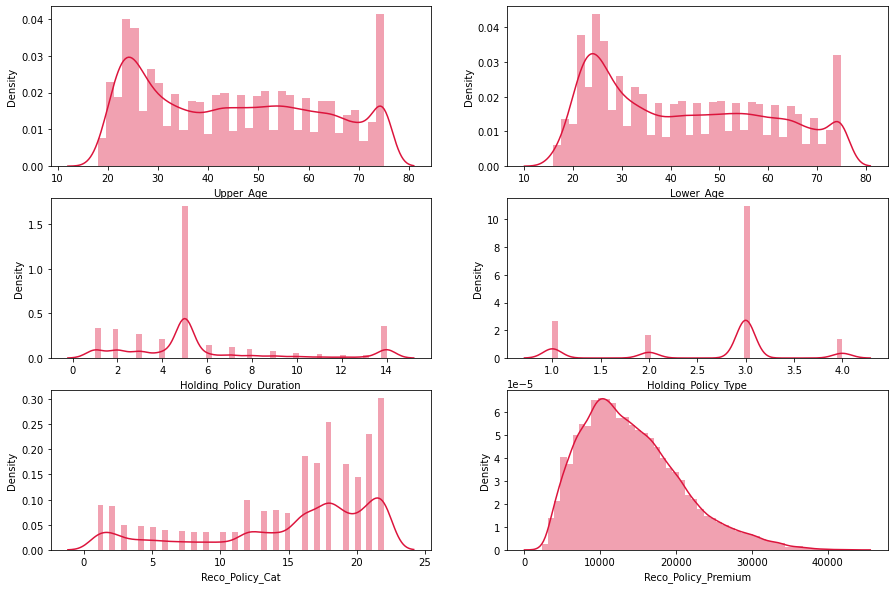

In [118]:
plt.figure(figsize = (15,10))
feature = numeric_cols_train.columns[0:6]
for i in enumerate(feature):
    plt.subplot(3,2, i[0]+1)
    sns.distplot(numeric_cols_train[i[1]], color='crimson')

C:\Users\ashashiju\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ashashiju\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ashashiju\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

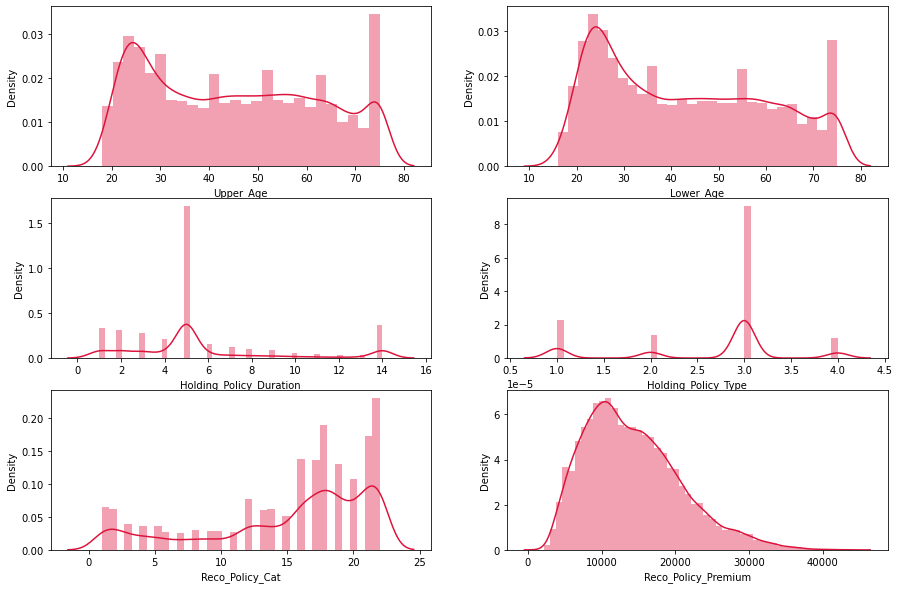

In [119]:
plt.figure(figsize = (15,10))
feature = numeric_cols_test.columns[0:6]
for i in enumerate(feature):
    plt.subplot(3,2, i[0]+1)
    sns.distplot(numeric_cols_test[i[1]], color='crimson')

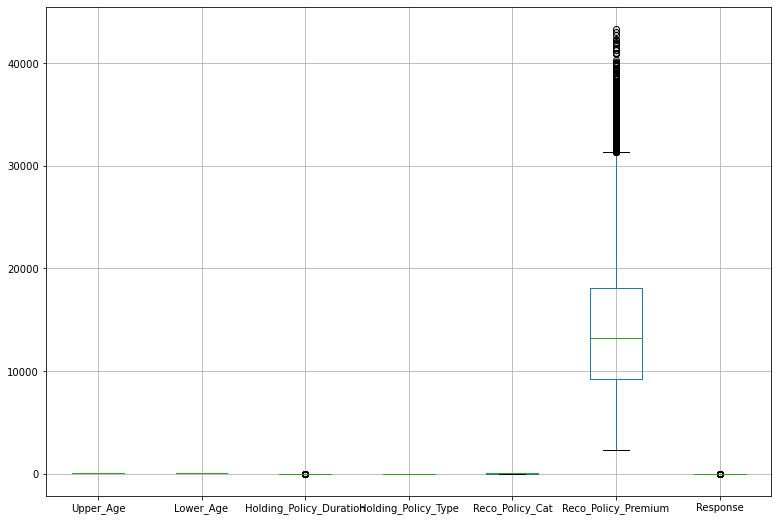

In [120]:
plt.figure(figsize = (13, 9)) 
train.boxplot()
plt.show()

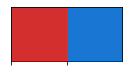

In [121]:
# Setting color palette
colors = ['#D32F2F','#1976D2']
sns.palplot(sns.color_palette(colors))

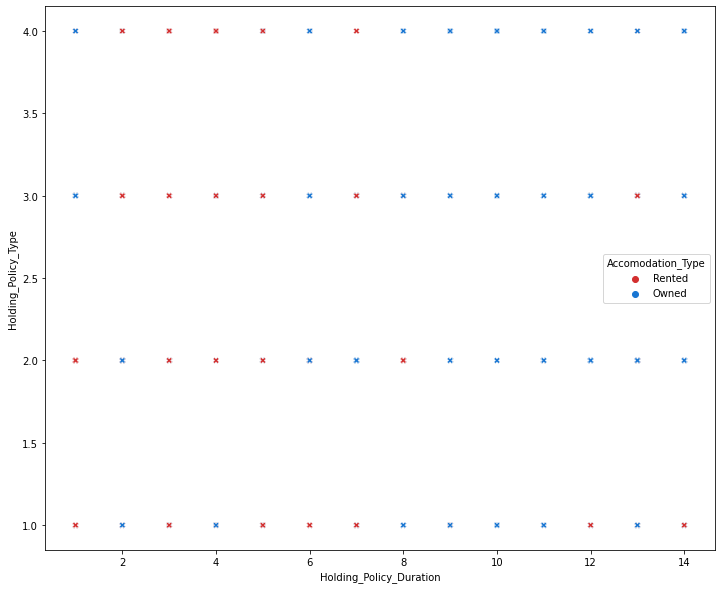

In [122]:
plt.figure(figsize=(12,10))
sns.scatterplot(x="Holding_Policy_Duration", y="Holding_Policy_Type", hue="Accomodation_Type", data=train, palette=colors, marker="X")
plt.show()

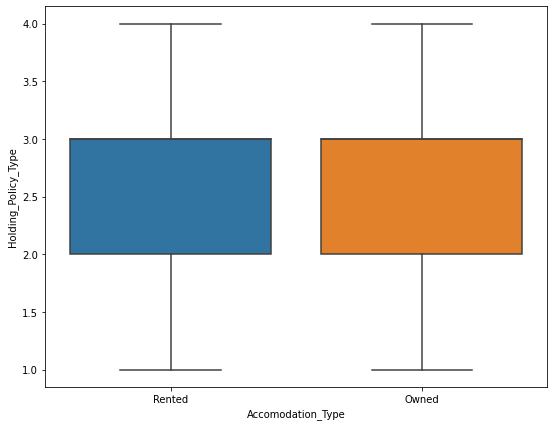

In [123]:
plt.figure(figsize=(9,7))
sns.boxplot(data=train, x='Accomodation_Type', y='Holding_Policy_Type')
plt.show()

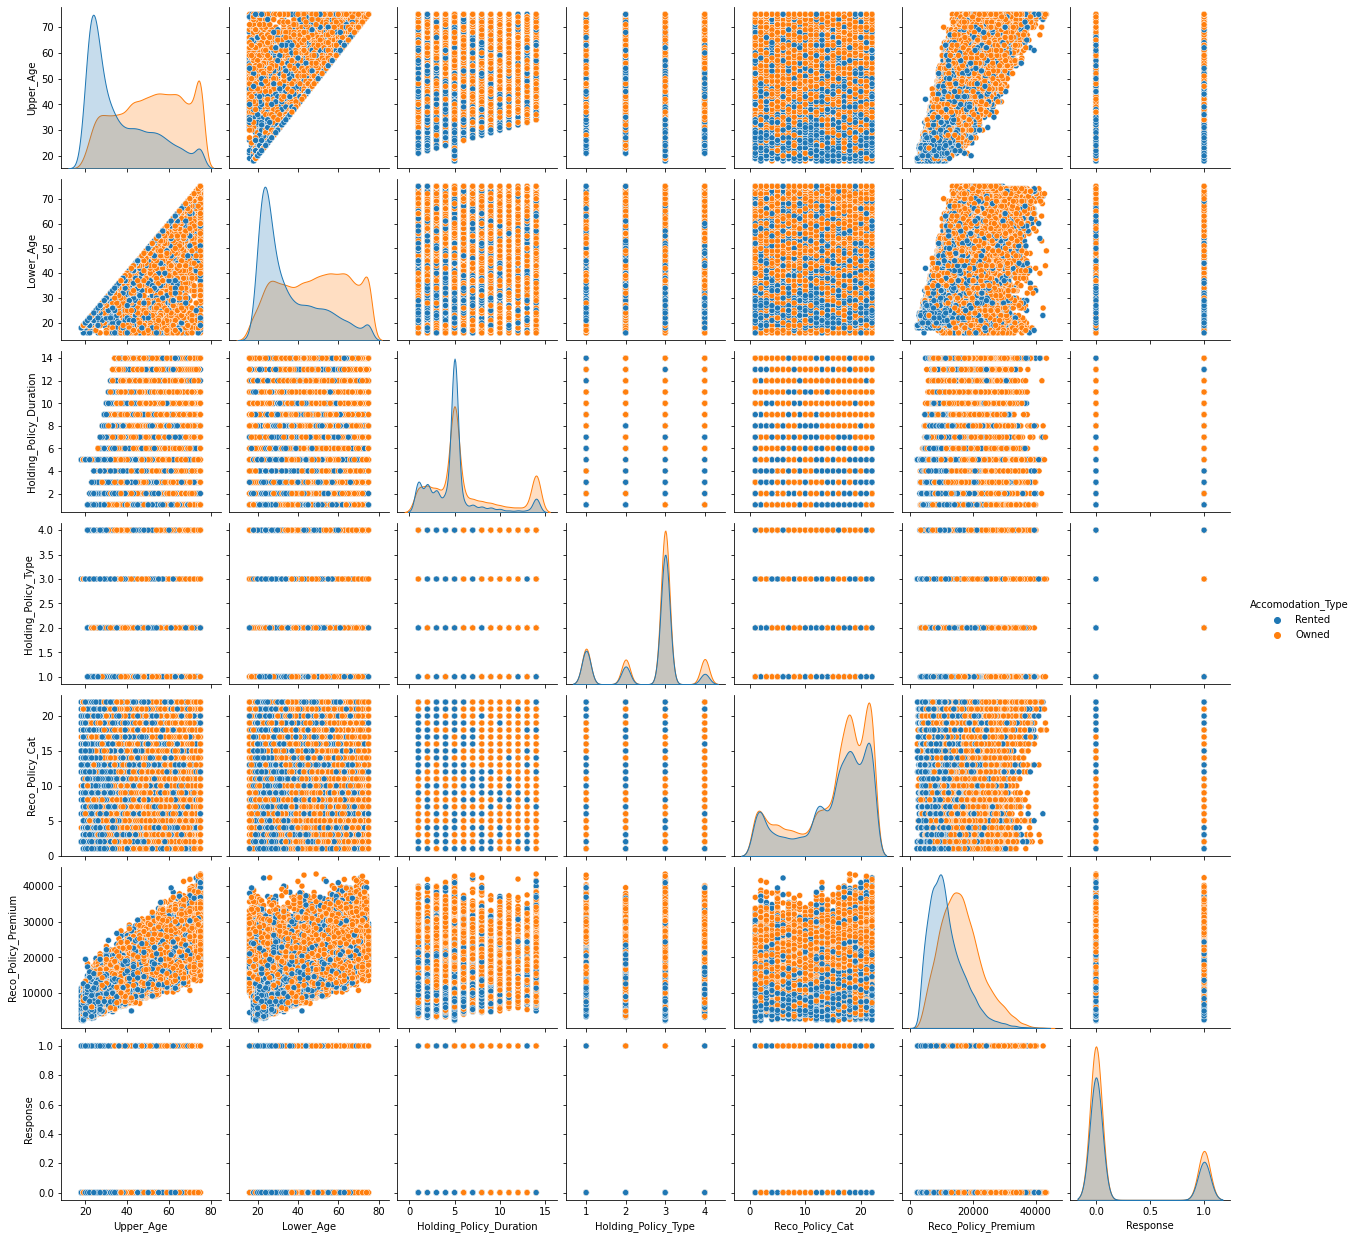

In [124]:
# Pairplot
sns.pairplot(train, hue='Accomodation_Type')
plt.show()

In [125]:
# Transform discrete values to columns with 1 and 0s
train_OHE = pd.get_dummies(train)

# Do the same for competition data
test_OHE = pd.get_dummies(test)

In [126]:
display(train_OHE.head())
display(test_OHE.head())

,Upper_Age,Lower_Age,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Accomodation_Type_Owned,Accomodation_Type_Rented,Reco_Insurance_Type_Individual,...,Is_Spouse_Yes,Health_Indicator_X1,Health_Indicator_X2,Health_Indicator_X3,Health_Indicator_X4,Health_Indicator_X5,Health_Indicator_X6,Health_Indicator_X7,Health_Indicator_X8,Health_Indicator_X9
0,36,36,14.0,3.0,22,11628.0,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0
1,75,22,5.0,3.0,22,30510.0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,32,32,1.0,1.0,19,7450.0,1,1,0,1,...,0,1,0,0,0,0,0,0,0,0
3,52,48,14.0,3.0,19,17780.0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,44,44,3.0,1.0,16,10404.0,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0


,Upper_Age,Lower_Age,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Accomodation_Type_Owned,Accomodation_Type_Rented,Reco_Insurance_Type_Individual,Reco_Insurance_Type_Joint,...,Is_Spouse_Yes,Health_Indicator_X1,Health_Indicator_X2,Health_Indicator_X3,Health_Indicator_X4,Health_Indicator_X5,Health_Indicator_X6,Health_Indicator_X7,Health_Indicator_X8,Health_Indicator_X9
0,30,30,6.0,3.0,5,11934.0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,69,68,3.0,3.0,18,32204.8,1,0,0,1,...,1,1,0,0,0,0,0,0,0,0
2,28,28,2.0,4.0,17,9240.0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
3,23,23,3.0,3.0,18,9086.0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
4,75,75,5.0,3.0,5,22534.0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [127]:
train_OHE.columns


Index(['Upper_Age', 'Lower_Age', 'Holding_Policy_Duration',
       'Holding_Policy_Type', 'Reco_Policy_Cat', 'Reco_Policy_Premium',
       'Response', 'Accomodation_Type_Owned', 'Accomodation_Type_Rented',
       'Reco_Insurance_Type_Individual', 'Reco_Insurance_Type_Joint',
       'Is_Spouse_No', 'Is_Spouse_Yes', 'Health_Indicator_X1',
       'Health_Indicator_X2', 'Health_Indicator_X3', 'Health_Indicator_X4',
       'Health_Indicator_X5', 'Health_Indicator_X6', 'Health_Indicator_X7',
       'Health_Indicator_X8', 'Health_Indicator_X9'],
      dtype='object')

In [151]:
test_OHE.columns

Index(['Upper_Age', 'Lower_Age', 'Holding_Policy_Duration',
       'Holding_Policy_Type', 'Reco_Policy_Cat', 'Reco_Policy_Premium',
       'Accomodation_Type_Owned', 'Accomodation_Type_Rented',
       'Reco_Insurance_Type_Individual', 'Reco_Insurance_Type_Joint',
       'Is_Spouse_No', 'Is_Spouse_Yes', 'Health_Indicator_X1',
       'Health_Indicator_X2', 'Health_Indicator_X3', 'Health_Indicator_X4',
       'Health_Indicator_X5', 'Health_Indicator_X6', 'Health_Indicator_X7',
       'Health_Indicator_X8', 'Health_Indicator_X9'],
      dtype='object')

In [128]:
print("Training Data Shape (Rows,Columns):",train_OHE.shape)
print("Competition Data Shape (Rows,Columns):", test_OHE.shape)

Training Data Shape (Rows,Columns): (50882, 22)
Competition Data Shape (Rows,Columns): (21805, 21)


In [129]:
# Independant variable
X = train_OHE.drop('Response',axis=1)        # All rows & columns exclude Target features

# Dependant variable
y = train_OHE['Response']    

In [130]:
# split  data into training and testing sets of 80:20 ratio
# 20% of test size selected
# random_state is random seed
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [131]:
# shape of X & Y test / train
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(40705, 21) (10177, 21) (40705,) (10177,)


### 1. Logistic Regression

In [132]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression()

In [133]:
y_pred_LogReg = LogReg.predict(X_test)

In [134]:
print("Train Score {:.2f} & Test Score {:.2f}".format(LogReg.score(X_train, y_train), LogReg.score(X_test, y_test)))

Train Score 0.76 & Test Score 0.76


### 2. Random Forest Classifier


In [135]:
rf = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=200, random_state=1)

In [136]:
y_pred_rf = rf.predict(X_test)

In [137]:
print("Train Score {:.2f} & Test Score {:.2f}".format(rf.score(X_train, y_train), rf.score(X_test, y_test)))

Train Score 0.76 & Test Score 0.76


### 3. XGBoost

In [138]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

C:\Users\ashashiju\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:37:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [139]:
y_pred_xgb = xgb.predict(X_test)

In [140]:
print("Train Score {:.2f} & Test Score {:.2f}".format(xgb.score(X_train, y_train), xgb.score(X_test, y_test)))

Train Score 0.78 & Test Score 0.75


### 4. CATBOOST

In [141]:
CB = CatBoostClassifier(verbose=0, n_estimators=100)
CB.fit(X_train, y_train)

In [142]:
y_pred_cb = CB.predict(X_test)

In [143]:
print("Train Score {:.2f} & Test Score {:.2f}".format(CB.score(X_train, y_train), CB.score(X_test, y_test)))

Train Score 0.77 & Test Score 0.75


### 5. LGBM

In [144]:
lgbm_model = LGBMClassifier()
lgbm_model = lgbm_model.fit(X_train, y_train)

In [145]:
y_pred_LGBM = lgbm_model.predict(X_test)

In [146]:
print("Train Score {:.2f} & Test Score {:.2f}".format(lgbm_model.score(X_train,y_train),lgbm_model.score(X_test,y_test)))

Train Score 0.77 & Test Score 0.76


In [147]:
y_pred_test = xgb.predict(test_OHE)

In [148]:
import pickle

In [155]:
# save the model to disk
filename = 'streamlit_insurance_leadprediction.pkl'
pickle.dump(LogReg, open(filename, 'wb'))

In [156]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.7554289083226884
